In [194]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import calendar
import math
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

In [197]:
df = pd.read_excel("obligacje-dane.xlsx") 
df

,Nazwa,Wartość nominału,Data wykupu,Oprocentowanie,kupon,wartosc rynkowa,Data zakupu,Data ostatniego kuponu
0,ECH1024,1000,2024-10-23,0.04500,2,1.0000,2022-12-01,2022-10-23
1,MBHPE11,1000,2025-04-24,0.01285,1,1.0000,2022-12-01,2022-04-24
2,EUR0126,1000,2026-01-19,0.01500,1,1.0300,2022-12-01,2022-01-19
3,EUR1027,1000,2027-10-22,0.01375,1,0.9907,2022-12-01,2022-10-22
4,EUR1028,1000,2028-10-25,0.01000,1,1.0650,2022-12-01,2022-10-25


Dodanie liczby dni od ostatniego kuponu

In [198]:
df["liczba dni"] = (df["Data zakupu"] - df["Data ostatniego kuponu"]).dt.days

In [199]:
df["cena czysta"] = df["Wartość nominału"] * df["wartosc rynkowa "]

In [201]:
df["wartosc kuponu"] = df["Wartość nominału"] * df["Oprocentowanie "]/df["kupon"]

In [202]:
df["cena brudna"] = df["cena czysta"] + ((df["liczba dni"] + 4) / 365) * df["wartosc kuponu"]

In [203]:
df["czas zycia"] = (df["Data wykupu"] - df["Data zakupu"]).dt.days/365

In [210]:
df["liczba_kuponow"] = df["czas zycia"].apply(ceil) * df["kupon"]

In [205]:
df["cena czysta"] = df["Wartość nominału"] * df["wartosc rynkowa "]

In [206]:
df

,Nazwa,Wartość nominału,Data wykupu,Oprocentowanie,kupon,wartosc rynkowa,Data zakupu,Data ostatniego kuponu,liczba dni,cena czysta,wartosc kuponu,cena brudna,czas zycia,liczba_kuponow
0,ECH1024,1000,2024-10-23,0.04500,2,1.0000,2022-12-01,2022-10-23,39,1000.0,22.50,1002.650685,1.895890,4
1,MBHPE11,1000,2025-04-24,0.01285,1,1.0000,2022-12-01,2022-04-24,221,1000.0,12.85,1007.921233,2.397260,3
2,EUR0126,1000,2026-01-19,0.01500,1,1.0300,2022-12-01,2022-01-19,316,1030.0,15.00,1043.150685,3.136986,4
3,EUR1027,1000,2027-10-22,0.01375,1,0.9907,2022-12-01,2022-10-22,40,990.7,13.75,992.357534,4.893151,5
4,EUR1028,1000,2028-10-25,0.01000,1,1.0650,2022-12-01,2022-10-25,37,1065.0,10.00,1066.123288,5.904110,6


# EFEKTYWNA STOPA ZWROTU

In [212]:
def fx(x):
    
    tn = tn1 
    suma = 0
    for i in range(ilosc_kuponow):
        suma += wartosc_kuponu*pow(1+x,i)
    suma = (suma-P*pow(1+x,tn)+cena_nominalna)
    return suma

In [213]:
def bis(fx,a,b,err):
    while np.absolute(b-a)>err:
        midPoint=(a+b)*0.5
        if fx(midPoint)*fx(a)<0:
            b=midPoint
        midPoint=(a+b)*0.5
        if fx(midPoint)*fx(b)<0:
            a=midPoint
    return b-(b-a)*fx(b)/(fx(b)-fx(a))

    if metoda==2:#bisekcja
        i=1
        a=int(input("Podaj pierwszy kraniec przedziału: "))
        b=int(input("Podaj drugi kraniec przedziału: "))
    while i<n:
        err=0.0001
    print("x= ",bis(fx,a,b,err))
    i=i+1

In [214]:
r_list = []
for i in range(0, 5):
    ilosc_kuponow = df["liczba_kuponow"][i]
    P = df["cena brudna"][i] * 1.019              
    wartosc_kuponu = df["wartosc kuponu"][i]
    cena_nominalna = df["Wartość nominału"][i]
    tn1 = df["czas zycia"][i]
    kupon = df["kupon"][i]    
    r = bis(fx, -1, 1, 0.001)
    r_list.append(r)

In [215]:
df["R"] = r_list
df

,Nazwa,Wartość nominału,Data wykupu,Oprocentowanie,kupon,wartosc rynkowa,Data zakupu,Data ostatniego kuponu,liczba dni,cena czysta,wartosc kuponu,cena brudna,czas zycia,liczba_kuponow,liczba kuponow,R
0,ECH1024,1000,2024-10-23,0.04500,2,1.0000,2022-12-01,2022-10-23,39,1000.0,22.50,1002.650685,1.895890,4,4,0.037302
1,MBHPE11,1000,2025-04-24,0.01285,1,1.0000,2022-12-01,2022-04-24,221,1000.0,12.85,1007.921233,2.397260,3,3,0.004720
2,EUR0126,1000,2026-01-19,0.01500,1,1.0300,2022-12-01,2022-01-19,316,1030.0,15.00,1043.150685,3.136986,4,4,-0.000917
3,EUR1027,1000,2027-10-22,0.01375,1,0.9907,2022-12-01,2022-10-22,40,990.7,13.75,992.357534,4.893151,5,5,0.011688
4,EUR1028,1000,2028-10-25,0.01000,1,1.0650,2022-12-01,2022-10-25,37,1065.0,10.00,1066.123288,5.904110,6,6,-0.004256


# STRUKTURA TERMINOWA

In [216]:
B1 = (1 + df["R"][0])**(-df["czas zycia"][0])
B2 = (1 + df["R"][1])**(-df["czas zycia"][1])
B3 = (1 + df["R"][2])**(-df["czas zycia"][2])
B4 = (1 + df["R"][3])**(-df["czas zycia"][3])
B5 = (1 + df["R"][4])**(-df["czas zycia"][4])

B = list([1, B1, B2, B3, B4, B5])
t = [0, df["czas zycia"][0], df["czas zycia"][1], df["czas zycia"][2], df["czas zycia"][3], df["czas zycia"][4]]

df_B = pd.DataFrame(list(zip(t, B)), columns =['t', 'B'])
df_B

,t,B
0,0.000000,1.000000
1,1.895890,0.932922
2,2.397260,0.988774
3,3.136986,1.002881
4,4.893151,0.944727
5,5.904110,1.025504


# PRZEDŁUŻENIE I METODA

In [217]:
def przedluzenie1(t, t1, t2, b1, b2):
    return b1**((t2 - t)/(t2 - t1))*b2**((t - t1)/(t2 - t1))

In [218]:
df_B1 = pd.DataFrame(columns =['t', 'B'])

In [219]:
for i in range(1, 6):
    punkty_t = np.arange(df_B['t'][i-1], df_B['t'][i], 0.001)
    B_punkty = przedluzenie1(punkty_t, df_B['t'][i-1], df_B['t'][i], df_B['B'][i-1], df_B['B'][i])
    dane = pd.DataFrame(list(zip(punkty_t, B_punkty)), columns =['t', 'B'])
    df_B1 = df_B1.append(dane)

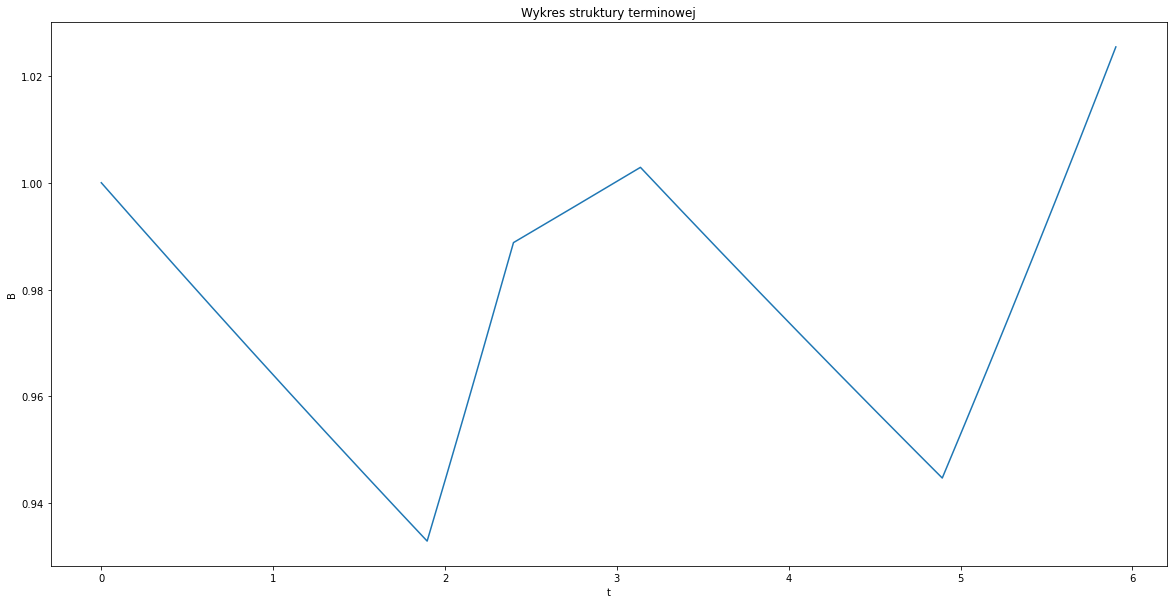

In [225]:
fig, ax = plt.subplots(figsize =(20, 10))
plt.plot(df_B1['t'], df_B1['B'])
plt.xlabel('t')
plt.ylabel('B')
plt.title('Wykres struktury terminowej')
plt.show()

# PRZEDŁUŻENIE II METODA

In [221]:
def przedluzenie2(t, t1, t2, b1, b2):
    return b1 + (b2 - b1) * ((t - t1) / (t2 - t1))

In [222]:
df_B2 = pd.DataFrame(columns =['t', 'B'])

In [223]:
for i in range(1, 6):
    punkty_t = np.arange(df_B['t'][i-1], df_B['t'][i], 0.001)
    B_punkty = przedluzenie2(punkty_t, df_B['t'][i-1], df_B['t'][i], df_B['B'][i-1], df_B['B'][i])
    dane = pd.DataFrame(list(zip(punkty_t, B_punkty)), columns =['t', 'B'])
    df_B2 = df_B2.append(dane)

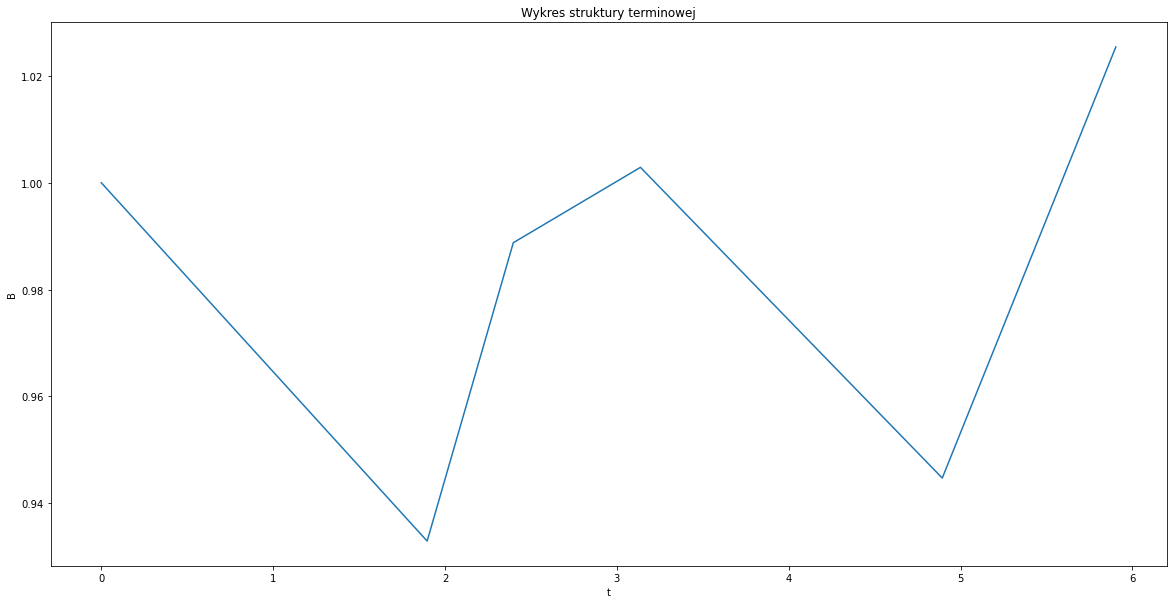

In [226]:
fig, ax = plt.subplots(figsize =(20, 10))
plt.plot(df_B2['t'], df_B2['B'])
plt.xlabel('t')
plt.ylabel('B')
plt.title('Wykres struktury terminowej')
plt.show()